In [67]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load Dataset
df = pd.read_csv('Car.csv')

In [ ]:
# Import warnings for not showing
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Check Dataset top 5 rows
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [ ]:
# Basic Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


**Data Cleaning**

In [ ]:
# Check Missing Values
print(df.isnull().sum())
print("Total Missing Values in Dataset")
print((df.isnull().sum().sum()) / (len(df))*100) # Total Percent of Missing Values

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64
Total Missing Values in Dataset
11.995515695067265


In [ ]:
# Fill missing values with mode
df['fuel_type'].fillna(df['fuel_type'].mode()[0],inplace=True)

In [ ]:
# Check unique values understanding
df['kms_driven'].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [ ]:
df['kms_driven'] = df['kms_driven'].str.replace(',', '').str.extract('(\d+)') # Remove ","
df['kms_driven'] = pd.to_numeric(df['kms_driven'], errors='coerce') # Replace alphabaticaly values with Nan

In [ ]:
df['kms_driven'] = df['kms_driven'].astype(float) # Change data type
df['kms_driven'].fillna(df['kms_driven'].mean(),inplace=True) # Fill missing values

In [ ]:
# Check missing values
df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [ ]:
df['Price'] = df['Price'].str.replace(',','') # Remove ","
df['Price'] = pd.to_numeric(df['Price'],errors='coerce') # Replace alphabaticaly values with Nan

In [ ]:
df['Price'] = df['Price'].astype(float) # Change data type
df['Price'].fillna(df['Price'].mean(),inplace=True) # Fill missing values

In [ ]:
# Check Duplicates
df.duplicated().sum()

np.int64(94)

In [ ]:
# Remove 
df.drop_duplicates(inplace=True)

In [82]:
df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [ ]:
df = df[df['year'].str.isnumeric()] # Keep only numerics values
df['year'] = df['year'].astype(int) # Change data type

In [ ]:
# Add new feature based on car specific car  company
df['brand_count'] = df.groupby('company')['company'].transform('count')

In [ ]:
# Add new feature  of "model" extract from "name" feature
df['model'] = df['name'].str.extract(r'(\b[A-Za-z]+\s?\d*\b)')

In [ ]:
# Add new feature based on price
df['price_category'] = pd.qcut(df['Price'], q=3, labels=['Low', 'Medium', 'High'])

**Data Analysis**

In [ ]:
# Check 5 highest price of car
df.sort_values('Price',ascending=False).head(5)

,name,company,year,Price,kms_driven,fuel_type,brand_count,model,price_category
562,Mahindra XUV500 W6,Mahindra,2014,8500003.0,45000.0,Diesel,79,Mahindra,High
719,Audi A3 Cabriolet 40 TFSI,Audi,2015,3100000.0,12516.0,Petrol,10,Audi,High
838,Ford Endeavor 4x4 Thunder Plus,Ford,2019,2900000.0,9000.0,Diesel,27,Ford,High
510,Jaguar XE XE Portfolio,Jaguar,2016,2800000.0,8500.0,Petrol,2,Jaguar,High
668,Audi Q5 2.0 TDI quattro Premium Plus,Audi,2014,2390000.0,34000.0,Diesel,10,Audi,High


In [ ]:
# Check car maximum driven 
df.groupby('company')['kms_driven'].max()

company
Audi           47000.000000
BMW            72000.000000
Chevrolet     100800.000000
Datsun         22000.000000
Fiat           65000.000000
Force         140000.000000
Ford           99000.000000
Hindustan     200000.000000
Honda         400000.000000
Hyundai       180000.000000
I              46010.550119
Jaguar         29000.000000
Jeep            3528.000000
Land           30000.000000
Mahindra      170000.000000
Maruti        200000.000000
Mercedes       76000.000000
Mini           13500.000000
Mitsubishi     50000.000000
Nissan         62500.000000
Renault        65000.000000
Skoda          68000.000000
Tata          200000.000000
Toyota        147000.000000
Volkswagen     97000.000000
Volvo          42000.000000
Name: kms_driven, dtype: float64

In [ ]:
# Check 5 highest car by price
df.sort_values('Price',ascending=True).head(5)

,name,company,year,Price,kms_driven,fuel_type,brand_count,model,price_category
389,Maruti Suzuki Maruti 800 Std – Befo,Maruti,1995,30000.0,55000.0,Petrol,210,Maruti,Low
851,Maruti Suzuki 800 Std BS III,Maruti,2000,30000.0,33400.0,Petrol,210,Maruti,Low
454,Tata Nano GenX XMA,Tata,2010,32000.0,44005.0,Petrol,63,Tata,Low
598,Tata Nano LX Special Edition,Tata,2010,32000.0,48008.0,Petrol,63,Tata,Low
553,Tata Indica V2 DLG,Tata,2005,35000.0,150000.0,Diesel,63,Tata,Low


In [ ]:
# Check min,max and mean price of different company
df.groupby('company')['Price'].agg([min,max,'mean']).head(12)

,min,max,mean
company,,,
Audi,5.000000e+05,3.100000e+06,1.554700e+06
BMW,6.000000e+05,1.600000e+06,1.049875e+06
Chevrolet,8.000000e+04,4.900000e+05,1.957617e+05
Datsun,2.350000e+05,4.046885e+05,2.799552e+05
Fiat,7.500000e+04,1.695000e+05,1.215000e+05
Force,5.500000e+05,5.800000e+05,5.650000e+05
Ford,4.500000e+04,2.900000e+06,4.855069e+05
Hindustan,7.000000e+04,7.500000e+05,3.033333e+05
Honda,6.500000e+04,8.600000e+05,3.456535e+05


In [ ]:
# Counting car in different year
df.groupby('year')['name'].size().sort_values(ascending=False)

year
2015    93
2014    86
2013    75
2016    71
2012    63
2011    56
2009    52
2017    50
2010    42
2018    32
2006    21
2019    20
2007    17
2008    15
2003    13
2005    13
2004    11
2000     7
2001     5
2002     5
1995     2
Name: name, dtype: int64

**Feature Engineering**

In [ ]:
# Add new feature based on price
df['price_category'] = pd.qcut(df['Price'], q=3, labels=['Low', 'Medium', 'High'])

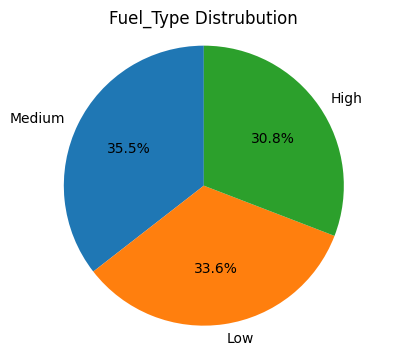

In [ ]:
plt.figure(figsize=(5,4))
category = df['price_category'].value_counts()
plt.pie(category,labels=category.index,autopct='%1.1f%%',startangle=90)
plt.title("Fuel_Type Distrubution")
plt.axis('equal')
plt.show()

In [94]:
df.groupby('company')['brand_count'].size().sort_values(ascending=False)

company
Maruti        210
Hyundai       133
Mahindra       79
Tata           63
Honda          52
Toyota         37
Chevrolet      34
Ford           27
Renault        27
Volkswagen     18
Skoda          10
Audi           10
BMW             8
Datsun          7
Nissan          6
Mercedes        6
Mitsubishi      5
Fiat            3
Mini            3
Hindustan       3
Force           2
Jaguar          2
Jeep            1
I               1
Land            1
Volvo           1
Name: brand_count, dtype: int64

**Data Encoding**

In [95]:
df.head(2)

,name,company,year,Price,kms_driven,fuel_type,brand_count,model,price_category
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000.0,45000.0,Petrol,133,Hyundai,Low
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000.0,40.0,Diesel,79,Mahindra,High


In [96]:
df['price_category'].unique()

['Low', 'High', 'Medium']
Categories (3, object): ['Low' < 'Medium' < 'High']

In [ ]:
# Encode feature
df['price_category'] = df['price_category'].map({'Low':1,'Medium':2,'High':3})

In [98]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

In [99]:
df['fuel_type'] = df['fuel_type'].map({'Petrol':1,'Diesel':2,'LPG':3})

In [ ]:
# Import Label Encoder and Standard Scalar
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# Encode "Model" and "name" feature by label encoder
le = LabelEncoder()
df['model'] = le.fit_transform(df['model'])
df['name'] = le.fit_transform(df['name'])

In [102]:
df.head(4)

,name,company,year,Price,kms_driven,fuel_type,brand_count,model,price_category
0,143,Hyundai,2007,80000.000000,45000.0,1,133,12,1
1,190,Mahindra,2006,425000.000000,40.0,2,79,17,3
2,238,Maruti,2018,404688.534422,22000.0,1,210,18,2
3,132,Hyundai,2014,325000.000000,28000.0,1,133,12,2


In [ ]:
# Drop "Company" feature
df.drop('company',axis=1,inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

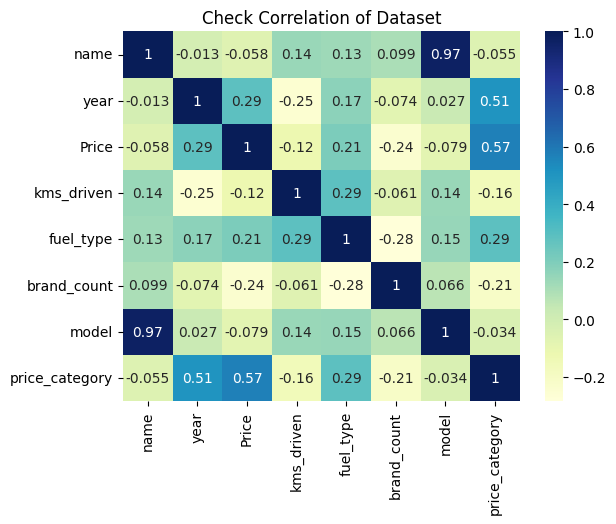

In [ ]:
# Check Correlation by heatmap
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='YlGnBu',cbar=True)
plt.title('Check Correlation of Dataset')
plt.show

In [ ]:
# Transform Data
ss = StandardScaler()
df['fuel_type'] = ss.fit_transform(df[['fuel_type']])

In [106]:
df['kms_driven'] = ss.fit_transform(df[['kms_driven']])

In [107]:
df.head(2)

,name,year,Price,kms_driven,fuel_type,brand_count,model,price_category
0,143,2007,80000.0,-0.042589,-0.914325,133,12,1
1,190,2006,425000.0,-1.339370,1.070688,79,17,3


In [ ]:
# Set "X" and "Y"
x = df.drop(['Price'],axis=1)
y = df['Price']

In [ ]:
#Import some algorithms and training and testing
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
# Training and Testing data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# Fit "KNeighborsRegressor" algorithm and score
kn = KNeighborsRegressor(n_neighbors=9)
kn.fit(x_train,y_train)
kn.score(x_test,y_test)*100, kn.score(x_train,y_train)*100

(32.760673194847925, 43.31473925533599)

**Lets Fit RandomForest Algorthms**

In [ ]:
rf = RandomForestRegressor(n_estimators=120,max_depth=9,min_samples_split=5)

In [ ]:
# Fit "RandomForestRegressor"
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=9, min_samples_split=5, n_estimators=120)

In [ ]:
# Check Score of model
rf.score(x_test,y_test)*100, rf.score(x_train,y_train)*100

(64.32205015884279, 74.21682879328311)

Hyperparameter Tunning

In [193]:
param = {
    "max_depth" : [1,3,6,9],
    "n_estimators" : [40,60,80,100,120,140],
    "min_samples_split": [2,3,5,7,9]
}
rv = RandomizedSearchCV(RandomForestRegressor(),param_distributions=param,cv=2)

In [194]:
rv.fit(x_train,y_train)

RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [1, 3, 6, 9],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [40, 60, 80, 100, 120,
                                                         140]})

In [195]:
rv.best_params_

{'n_estimators': 120, 'min_samples_split': 5, 'max_depth': 9}

**Now Fit Linear Regression**

In [201]:
score = []
for i in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    score.append(lr.score(x_test, y_test))  # Assuming you want to store the R² score

In [202]:
import numpy as np

In [203]:
np.argmax(score)

np.int64(637)

In [204]:
score[np.argmax(score)]

0.6815550501989983

In [206]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=637)
lr.fit(x_train,y_train)
lr.score(x_test,y_test), lr.score(x_train,y_train)

(0.6815550501989983, 0.33046093465647286)

RandomForest Give best accuracy score so lets predict with it

In [199]:
df.head()

,name,year,Price,kms_driven,fuel_type,brand_count,model,price_category
0,143,2007,80000.000000,-0.042589,-0.914325,133,12,1
1,190,2006,425000.000000,-1.339370,1.070688,79,17,3
2,238,2018,404688.534422,-0.705978,-0.914325,210,18,2
3,132,2014,325000.000000,-0.532920,-0.914325,133,12,2
4,52,2014,575000.000000,-0.302176,1.070688,27,9,3


In [200]:
rf.predict([[143,2007,-0.042589,-0.914325,133,12,1]])

array([105580.82102743])